# HSData2015_Assign
Please Submit via the Google form (Notice the 8 assignment tasks at the end of the notebook):


CSC 1895: Intro to Data Science - Response 5

by the beginning of class on 

Tuesday - September 24, 2019

In [0]:
#import python packages for input/output and for data analytics
import io
import pandas as pd

In [0]:
# import HSData2015.xlsx, 
# Note: Often you will need to run the cell twice to avoid error messages
# This is a Google issue
from google.colab import files
uploaded = files.upload()

Saving HSData2015.xlsx to HSData2015.xlsx


## Read the file into a Pandas Dataframe

In [0]:
# Read the data file into a pandas dataframe (Spreadsheet).
# Name the dataframe HSData2015
filename = 'HSData2015.xlsx'
HSData2015 = pd.read_excel(io.BytesIO(uploaded[filename]))

## Inspect the Dataframe to begin to understand what information is contained.

In [0]:
# View the first 5 rows of the new HSData2015 dataframe
HSData2015.head()

,year,district,district_name,school_name,school_id,grades_served,safe_school,average_daily_membership,total,white,african_american,hispanic,asian,native_american,hawaiian_pacisld,male,female,white_pct,african_american_pct,hispanic_pct,asian_pct,native_american_pct,hawaiian_pacisld_pct,male_pct,female_pct,white_male,african_american_male,hispanic_male,asian_male,native_american_male,hawaiian_pacisld_male,white_female,african_american_female,hispanic_female,asian_female,native_american_female,hawaiian_pacisld_female,limited_english_proficient_pct,limited_english_proficient,number_exempt_from_reading_assessment,students_with_disabilities,students_with_disabilities_pct,economically_disadvantaged,economically_disadvantaged_pct,attendance_rate_pct,cohort_dropout__pct,graduation_rate_nclb_pct,event_dropout_pct,all_grad_rate,white_grad_rate,african_american_grad_rate,hispanic_grad_rate,asian_grad_rate,native_american_grad_rate,hawaiian_pacisld_grad_rate,male_grad_rate,female_grad_rate,economically_disadvantaged_grad_rate,students_with_disabilities_grad_rate,limited_english_proficient_grad_rate,act_3yr_composite,act_3yr_english,act_3yr_math,act_3yr_reading,act_3yr_science,act_1yr_composite,act_1yr_english,act_1yr_math,act_1yr_reading,act_1yr_science
0,2015,10,Anderson County,Anderson County High School,2,Grades 9-12,SAFE SCHOOL,1040.0,1058.0,1039.0,5.0,3.0,5.0,6.0,NaN,537.0,521.0,98.204159,0.47259,0.283554,0.472590,0.567108,NaN,50.756144,49.243856,525.0,3.0,3.0,3.0,3.0,NaN,514.0,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,137.0,12.948960,465.0,43.950851,95.384615,1.659751,97.925311,0.699301,97.925311,97.899160,NaN,100.0,100.000000,100.0,NaN,97.478992,98.360656,96.428571,96.969697,NaN,19.5,18.9,19.5,19.4,19.7,20.0,19.9,19.4,20.2,19.9
1,2015,10,Anderson County,Anderson County Career Technical Center,3,Grades 9-12,SAFE SCHOOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,Anderson County,Clinton High School,25,Grades 9-12,SAFE SCHOOL,1091.0,1113.0,1031.0,59.0,12.0,6.0,5.0,NaN,581.0,532.0,92.632525,5.30099,1.078167,0.539084,0.449236,NaN,52.201258,47.798742,541.0,29.0,6.0,3.0,2.0,NaN,490.0,30.0,6.0,3.0,3.0,NaN,0.179695,2.0,NaN,164.0,14.734951,561.0,50.404313,94.408799,2.564103,96.703297,1.099764,96.703297,96.862745,93.333333,100.0,100.000000,100.0,NaN,95.714286,97.744361,94.610778,90.000000,100.0,19.3,19.1,18.5,19.6,19.3,19.8,19.7,18.8,20.1,20.0
3,2015,12,Oak Ridge,Oak Ridge High School,35,Grades 9-12,SAFE SCHOOL,1374.0,1389.0,1023.0,208.0,92.0,57.0,6.0,3.0,703.0,686.0,73.650108,14.9748,6.623470,4.103672,0.431965,0.215983,50.611951,49.388049,520.0,103.0,50.0,29.0,1.0,NaN,503.0,105.0,42.0,28.0,5.0,3.0,1.007919,14.0,NaN,173.0,12.455004,535.0,38.572459,95.269287,2.727273,90.000000,0.990099,90.000000,91.902834,80.392157,95.0,81.818182,100.0,NaN,87.500000,92.857143,82.307692,82.692308,75.0,23.0,22.8,22.6,23.3,22.8,23.1,22.9,22.4,23.6,22.9
4,2015,20,Bedford County,Cascade High School,13,Grades 9-12,SAFE SCHOOL,536.0,533.0,464.0,25.0,29.0,7.0,8.0,NaN,296.0,237.0,87.054409,4.69043,5.440901,1.313321,1.500938,NaN,55.534709,44.465291,254.0,16.0,18.0,3.0,5.0,NaN,210.0,9.0,11.0,4.0,3.0,NaN,0.750469,4.0,NaN,54.0,10.131332,231.0,43.339587,94.962687,1.652893,95.041322,0.500835,95.041322,94.545455,100.000000,100.0,100.000000,100.0,NaN,93.333333,97.826087,92.537313,90.000000,NaN,19.0,18.6,18.5,19.1,19.0,19.4,19.1,19.1,19.2,19.6


## Create a list of columns.

In [0]:
HSData2015.columns

Index(['year', 'district', 'district_name', 'school_name', 'school_id',
       'grades_served', 'safe_school', 'average_daily_membership', 'total',
       'white', 'african_american', 'hispanic', 'asian', 'native_american',
       'hawaiian_pacisld', 'male', 'female', 'white_pct',
       'african_american_pct', 'hispanic_pct', 'asian_pct',
       'native_american_pct', 'hawaiian_pacisld_pct', 'male_pct', 'female_pct',
       'white_male', 'african_american_male', 'hispanic_male', 'asian_male',
       'native_american_male', 'hawaiian_pacisld_male', 'white_female',
       'african_american_female', 'hispanic_female', 'asian_female',
       'native_american_female', 'hawaiian_pacisld_female',
       'limited_english_proficient_pct', 'limited_english_proficient',
       'number_exempt_from_reading_assessment', 'students_with_disabilities',
       'students_with_disabilities_pct', 'economically_disadvantaged',
       'economically_disadvantaged_pct', 'attendance_rate_pct',
       'cohort_d

## Create a list called 'Columns' and copy the above list into it.

Then keep only the columns for which you have interest. 


In [0]:
Columns = ['district_name', 'school_name',
       'total',
       'white_pct',
       'african_american_pct', 'hispanic_pct', 'asian_pct',
       'limited_english_proficient_pct', 
       'students_with_disabilities_pct', 
       'economically_disadvantaged_pct', 'attendance_rate_pct',
       'all_grad_rate', 
       'economically_disadvantaged_grad_rate',
       'students_with_disabilities_grad_rate',
       'limited_english_proficient_grad_rate', 'act_3yr_composite',
       'act_3yr_english', 'act_3yr_math', 'act_3yr_reading', 'act_3yr_science',
       ]

## Restrict your dataframe to only the columns selected above.

And view a selection of 5 columns

In [0]:
HSData2015 = HSData2015[Columns]
HSData2015.head()

,district_name,school_name,total,white_pct,african_american_pct,hispanic_pct,asian_pct,limited_english_proficient_pct,students_with_disabilities_pct,economically_disadvantaged_pct,attendance_rate_pct,all_grad_rate,economically_disadvantaged_grad_rate,students_with_disabilities_grad_rate,limited_english_proficient_grad_rate,act_3yr_composite,act_3yr_english,act_3yr_math,act_3yr_reading,act_3yr_science
0,Anderson County,Anderson County High School,1058.0,98.204159,0.47259,0.283554,0.472590,NaN,12.948960,43.950851,95.384615,97.925311,96.428571,96.969697,NaN,19.5,18.9,19.5,19.4,19.7
1,Anderson County,Anderson County Career Technical Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anderson County,Clinton High School,1113.0,92.632525,5.30099,1.078167,0.539084,0.179695,14.734951,50.404313,94.408799,96.703297,94.610778,90.000000,100.0,19.3,19.1,18.5,19.6,19.3
3,Oak Ridge,Oak Ridge High School,1389.0,73.650108,14.9748,6.623470,4.103672,1.007919,12.455004,38.572459,95.269287,90.000000,82.307692,82.692308,75.0,23.0,22.8,22.6,23.3,22.8
4,Bedford County,Cascade High School,533.0,87.054409,4.69043,5.440901,1.313321,0.750469,10.131332,43.339587,94.962687,95.041322,92.537313,90.000000,NaN,19.0,18.6,18.5,19.1,19.0


## Determine if there are schools where HSData2015['total'] is NaN

In [0]:
print(len(HSData2015[HSData2015['total'].isnull()]))
HSData2015[HSData2015['total'].isnull()].head(20)


29


,district_name,school_name,total,white_pct,african_american_pct,hispanic_pct,asian_pct,limited_english_proficient_pct,students_with_disabilities_pct,economically_disadvantaged_pct,attendance_rate_pct,all_grad_rate,economically_disadvantaged_grad_rate,students_with_disabilities_grad_rate,limited_english_proficient_grad_rate,act_3yr_composite,act_3yr_english,act_3yr_math,act_3yr_reading,act_3yr_science
1,Anderson County,Anderson County Career Technical Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Benton County,Benton Co Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Benton County,Benton County Career / Technical Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Bradley County,Reach Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Campbell County,Campbell Co Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Cheatham County,Cheatham Co Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Claiborne County,Claiborne Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Clay County,Clay Co Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Dickson County,Dickson County Adult High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Grundy County,Grundy Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## Omit them.

In [0]:
HSData2015 = HSData2015[HSData2015['total'].notnull()]
HSData2015.sample(5)

,district_name,school_name,total,white_pct,african_american_pct,hispanic_pct,asian_pct,limited_english_proficient_pct,students_with_disabilities_pct,economically_disadvantaged_pct,attendance_rate_pct,all_grad_rate,economically_disadvantaged_grad_rate,students_with_disabilities_grad_rate,limited_english_proficient_grad_rate,act_3yr_composite,act_3yr_english,act_3yr_math,act_3yr_reading,act_3yr_science
182,Morgan County,Central High School,416.0,98.557692,0.480769,0.480769,NaN,NaN,12.740385,60.576923,95.781638,95.000000,96.153846,81.818182,NaN,17.4,16.8,17.0,18.0,17.5
92,Greene County,West Greene High School,667.0,97.301349,1.04948,1.049475,0.149925,0.149925,14.242879,60.179641,94.640123,91.823899,91.304348,86.206897,100.0,18.3,17.5,17.9,18.7,18.4
217,Sevier County,Seymour High School,1155.0,95.064935,1.81818,1.991342,0.432900,0.086580,6.406926,41.038961,94.732143,91.666667,85.833333,63.157895,100.0,20.2,20.3,19.6,20.5,20.2
169,Maury County,Spring Hill High School,992.0,75.604839,15.2218,7.762097,1.310484,0.907258,11.088710,38.306452,95.740365,95.780591,92.592593,96.428571,100.0,18.9,18.1,18.6,19.3,19.0
197,Roane County,Roane County High School,732.0,93.852459,2.86885,1.639344,0.956284,NaN,11.065574,37.841530,98.410405,95.714286,93.939394,76.470588,NaN,20.2,20.0,19.7,20.9,19.8


## Fill remaining NaN with zeros.

In [0]:
HSData2015.fillna(0, inplace = True)
HSData2015.head()

,district_name,school_name,total,white_pct,african_american_pct,hispanic_pct,asian_pct,limited_english_proficient_pct,students_with_disabilities_pct,economically_disadvantaged_pct,attendance_rate_pct,all_grad_rate,economically_disadvantaged_grad_rate,students_with_disabilities_grad_rate,limited_english_proficient_grad_rate,act_3yr_composite,act_3yr_english,act_3yr_math,act_3yr_reading,act_3yr_science
0,Anderson County,Anderson County High School,1058.0,98.204159,0.47259,0.283554,0.472590,0.000000,12.948960,43.950851,95.384615,97.925311,96.428571,96.969697,0.0,19.5,18.9,19.5,19.4,19.7
2,Anderson County,Clinton High School,1113.0,92.632525,5.30099,1.078167,0.539084,0.179695,14.734951,50.404313,94.408799,96.703297,94.610778,90.000000,100.0,19.3,19.1,18.5,19.6,19.3
3,Oak Ridge,Oak Ridge High School,1389.0,73.650108,14.9748,6.623470,4.103672,1.007919,12.455004,38.572459,95.269287,90.000000,82.307692,82.692308,75.0,23.0,22.8,22.6,23.3,22.8
4,Bedford County,Cascade High School,533.0,87.054409,4.69043,5.440901,1.313321,0.750469,10.131332,43.339587,94.962687,95.041322,92.537313,90.000000,0.0,19.0,18.6,18.5,19.1,19.0
5,Bedford County,Shelbyville Central High School,1290.0,61.240310,15.4264,22.868217,0.232558,4.728682,10.620155,67.494182,94.988067,92.434211,90.277778,82.857143,95.0,17.8,17.2,18.0,17.8,18.0


## Correct the corrupted data in african_american_pct


In [0]:
Corruption = 'Grades 7-12'
Target = HSData2015.loc[HSData2015['african_american_pct'].str.isdigit().notnull()].african_american_pct.iloc[0]
Position = Target.find(Corruption)
Correction = float(Target[0:Position] + Target[Position + len(Corruption)-1:])
HSData2015.loc[HSData2015['african_american_pct'].str.isdigit().notnull(),'african_american_pct'] = Correction

IndexError: ignored

## Create a new dataframe representing only the 5 largest Metropolitan school districts. Call it 'HSLargeData2015'.

In [0]:
HSLargeData2015 = HSData2015[(HSData2015['district_name'] == 'Davidson County') | (HSData2015['district_name'] == 'Knox County') 
| (HSData2015['district_name'] == 'Shelby County') | (HSData2015['district_name'] == 'Hamilton County') 
| (HSData2015['district_name'] == 'Montgomery County')]

## Let's consider some basic plots ... provided by matplotlib and seaborn.

We need to import matplotlib.pyplot with alias plt (which is standard).

We will import seaborn as sns (also standard).

We will also use a 'magic' function indicated by '%' to indicate that we would like our plots to be viewed inline (or included in our Colab Notebooks).

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Restrict the dataframe to only those schools with reported act scores.
HSData2015 = HSData2015[HSData2015['act_3yr_composite'] != 0]

In [0]:
HSData2015['all_grad_rate'].describe()

count    268.000000
mean      87.666688
std       13.386767
min        0.000000
25%       85.463490
50%       91.111111
75%       95.010331
max      100.000000
Name: all_grad_rate, dtype: float64

Text(0.5, 1.0, 'Distribution of High Schools by all_grad_rate')

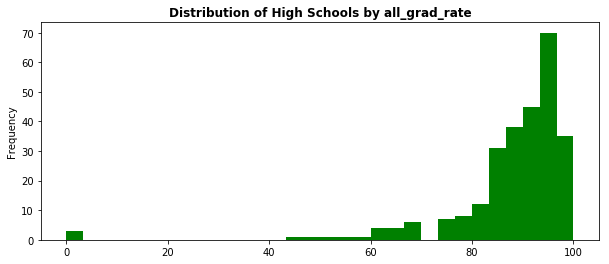

In [0]:
HSData2015['all_grad_rate'].plot.hist(figsize = (10,4), bins = 30, color = 'green')
plt.title('Distribution of High Schools by all_grad_rate', fontweight = 'bold')

## Assignment #1

In the next 2 cells, create view the basic statistics and create the histogram for 'all_grad_rate' for the HSLargeData2015 dataframe.

In [0]:
HSLargeData2015['all_grad_rate'].describe()

count     91.000000
mean      74.495507
std       26.739256
min        0.000000
25%       68.097509
50%       83.412322
75%       92.919374
max      100.000000
Name: all_grad_rate, dtype: float64

Text(0.5, 1.0, 'Distribution of High Schools by all_grad_rate')

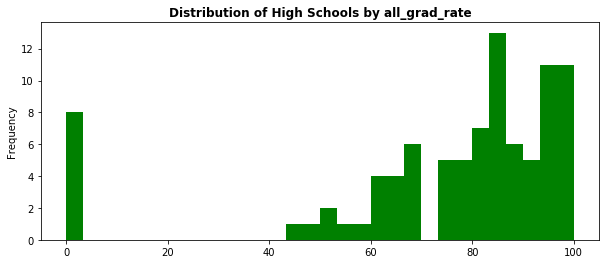

In [0]:
HSLargeData2015['all_grad_rate'].plot.hist(figsize = (10,4), bins = 30, color = 'green')
plt.title('Distribution of High Schools by all_grad_rate', fontweight = 'bold')

## Assignment #2

Make note of similarities/differences from the previous stats/histogram.

Your comments here:

Similarities: Both of these histograms have 0s and then skip to around 43 and then spike up at around 80 to 100. 

Differences: HSLargeData2015 has more of a significant spike at around 85; whereas, HSData2015 has a significant spike at around 90.

...

In [0]:
HSData2015['act_3yr_composite'].describe()     

count    268.000000
mean      18.639179
std        2.233737
min       13.300000
25%       17.600000
50%       18.700000
75%       19.800000
max       27.400000
Name: act_3yr_composite, dtype: float64

Text(0.5, 1.0, 'Distribution of High Schools by act_3yr_composite')

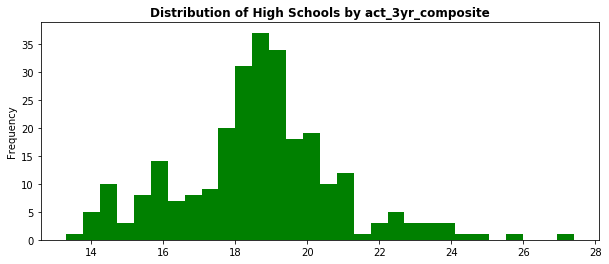

In [0]:
HSData2015['act_3yr_composite'].plot.hist(figsize = (10,4), bins = 30, color = 'green')
plt.title('Distribution of High Schools by act_3yr_composite', fontweight = 'bold')

## Assignment #3

In the next 2 cells, create view the basic statistics and create the histogram for 'act_3yr_composite' for the HSLargeData2015 dataframe.

In [0]:
HSLargeData2015['act_3yr_composite'].describe()

count    91.000000
mean     16.275824
std       5.058312
min       0.000000
25%      15.100000
50%      16.600000
75%      18.950000
max      27.400000
Name: act_3yr_composite, dtype: float64

Text(0.5, 1.0, 'Distribution of High Schools by act_3yr_composite')

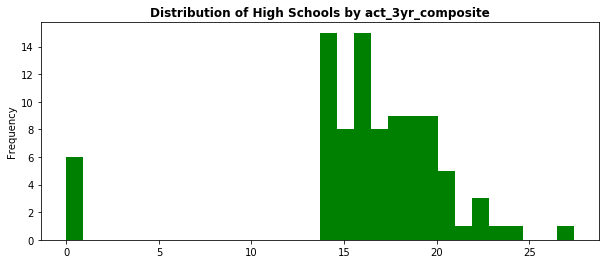

In [0]:
HSLargeData2015['act_3yr_composite'].plot.hist(figsize = (10,4), bins = 30, color = 'green')
plt.title('Distribution of High Schools by act_3yr_composite', fontweight = 'bold')

## Assignment #4

Make note of similarities/differences from the previous stats/histogram.

Your comments here:

Similarities: Both of these histograms have a significant spike around 15 to 20. 

Differences: The HSData2015 contains alot more information so it looks like it has less rapid movement between data than the HSLargeData2015 dataset.

...

## Considering the relationship between the values from two columns, we can now consider scatter plots. 

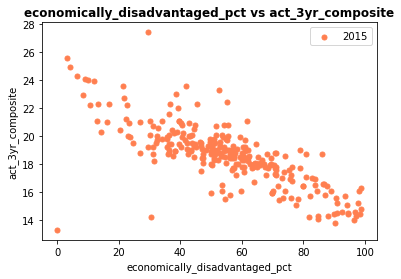

In [0]:
# Create a  scatter plot with a few parameters to increase readability
plt.scatter(HSData2015['economically_disadvantaged_pct'],HSData2015['act_3yr_composite'], s=25, c='coral', label='2015')

plt.legend()
plt.title('economically_disadvantaged_pct vs act_3yr_composite', fontweight = 'bold')
plt.xlabel('economically_disadvantaged_pct')
plt.ylabel('act_3yr_composite')
plt.show()

## Assignment #5

In the next cell, create a scatter plot for 'economically_disadvantaged_pct vs act_3yr_composite' for the HSLargeData2015 dataframe.

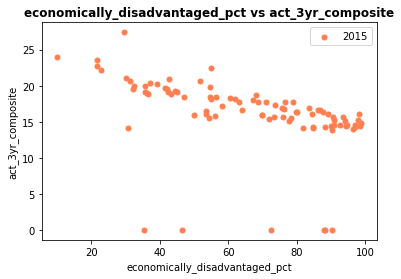

In [0]:
plt.scatter(HSLargeData2015['economically_disadvantaged_pct'],HSLargeData2015['act_3yr_composite'], s=25, c='coral', label='2015')

plt.legend()
plt.title('economically_disadvantaged_pct vs act_3yr_composite', fontweight = 'bold')
plt.xlabel('economically_disadvantaged_pct')
plt.ylabel('act_3yr_composite')
plt.show()

## Assignment #6

Make note of similarities/differences from the previous scatter plot.

Your comments here:

Similarities: Both of these graphs show that as the economically disadvantaged status gets higher, the act score gets lower.

Differences: The HSData2015 graph is alot steeper than the HSLargeData2015 graph.


...

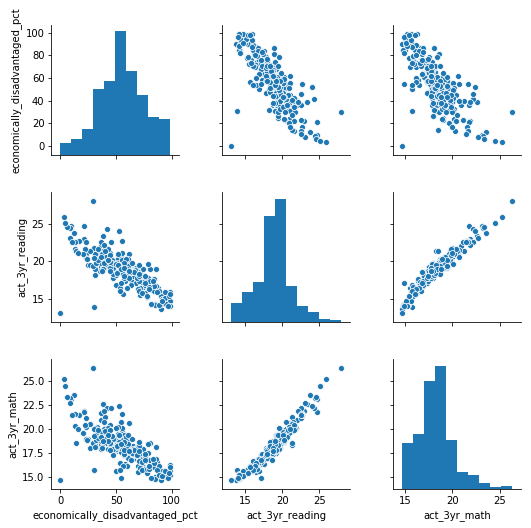

In [0]:
# Create pairplots (a grid of scatter plots and distribution plots)
# for each pair of columns listed from a dataframe
sns.pairplot(HSData2015[['economically_disadvantaged_pct','act_3yr_reading','act_3yr_math']])

## Assignment #7

In the next cell, create a pairplot for 'economically_disadvantaged_pct','act_3yr_reading', and 'act_3yr_math' for the HSLargeData2015 dataframe.

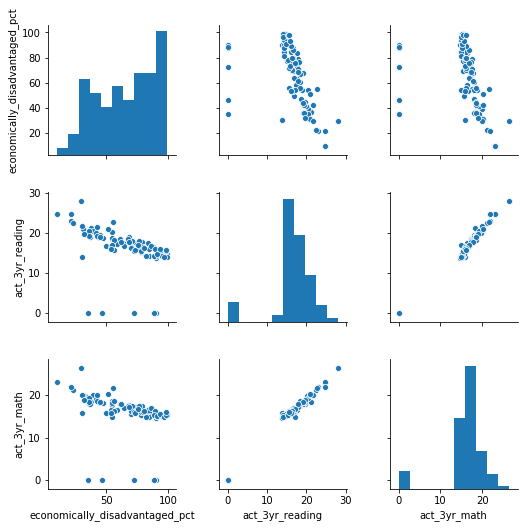

In [0]:
sns.pairplot(HSLargeData2015[['economically_disadvantaged_pct','act_3yr_reading','act_3yr_math']])

## Assignment #8

Make note of similarities/differences from the previous pairplot.

Your comments here:

Similarites: Both of these dataset's graphs follow the same overall patterns.

Differences: The HSLargeData2015 graphs are alot steeper.


...

## Resources
*   pandas documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html 
*   StackOverflow: https://stackoverflow.com/ 
*   Simply Google your question ... pandas Sort dataframe by column value ... then look for the StackOverflow response!
*   Another example: pandas select rows by multiple column values
*   pandas cheatsheet: http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3
*   Towards Data Science https://towardsdatascience.com/
*   Towards Data Science Article: Python's Data Analytics in 20 minutes https://towardsdatascience.com/how-to-master-pandas-8514f33f00f6












